In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset.drop(columns=["User ID","Gender"],inplace=True)
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
x=dataset.iloc[:,:-1]
y=dataset["Purchased"]

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x)
x=pd.DataFrame(ss.transform(x),columns=x.columns)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [11]:
dte = DecisionTreeClassifier(criterion="entropy")
dte.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [12]:
dte.score(x_test,y_test)

0.8375

In [13]:
from mlxtend.plotting import plot_decision_regions

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


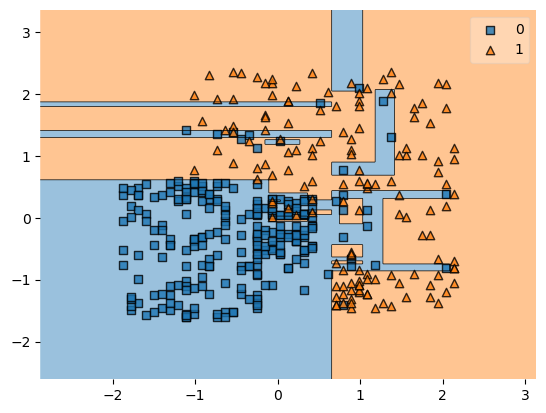

In [23]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dte)
plt.show()

# PRE Prunuing

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5) #we use max_depth to control the tree depth and save the data from overfeed
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [18]:
#We can check pruning requires or not by comparing test and train data , if d/f is big then we can do pruning
dt.score(x_test, y_test)*100 , dt.score(x_train, y_train)*100

(90.0, 93.4375)

In [19]:
from sklearn.tree import plot_tree

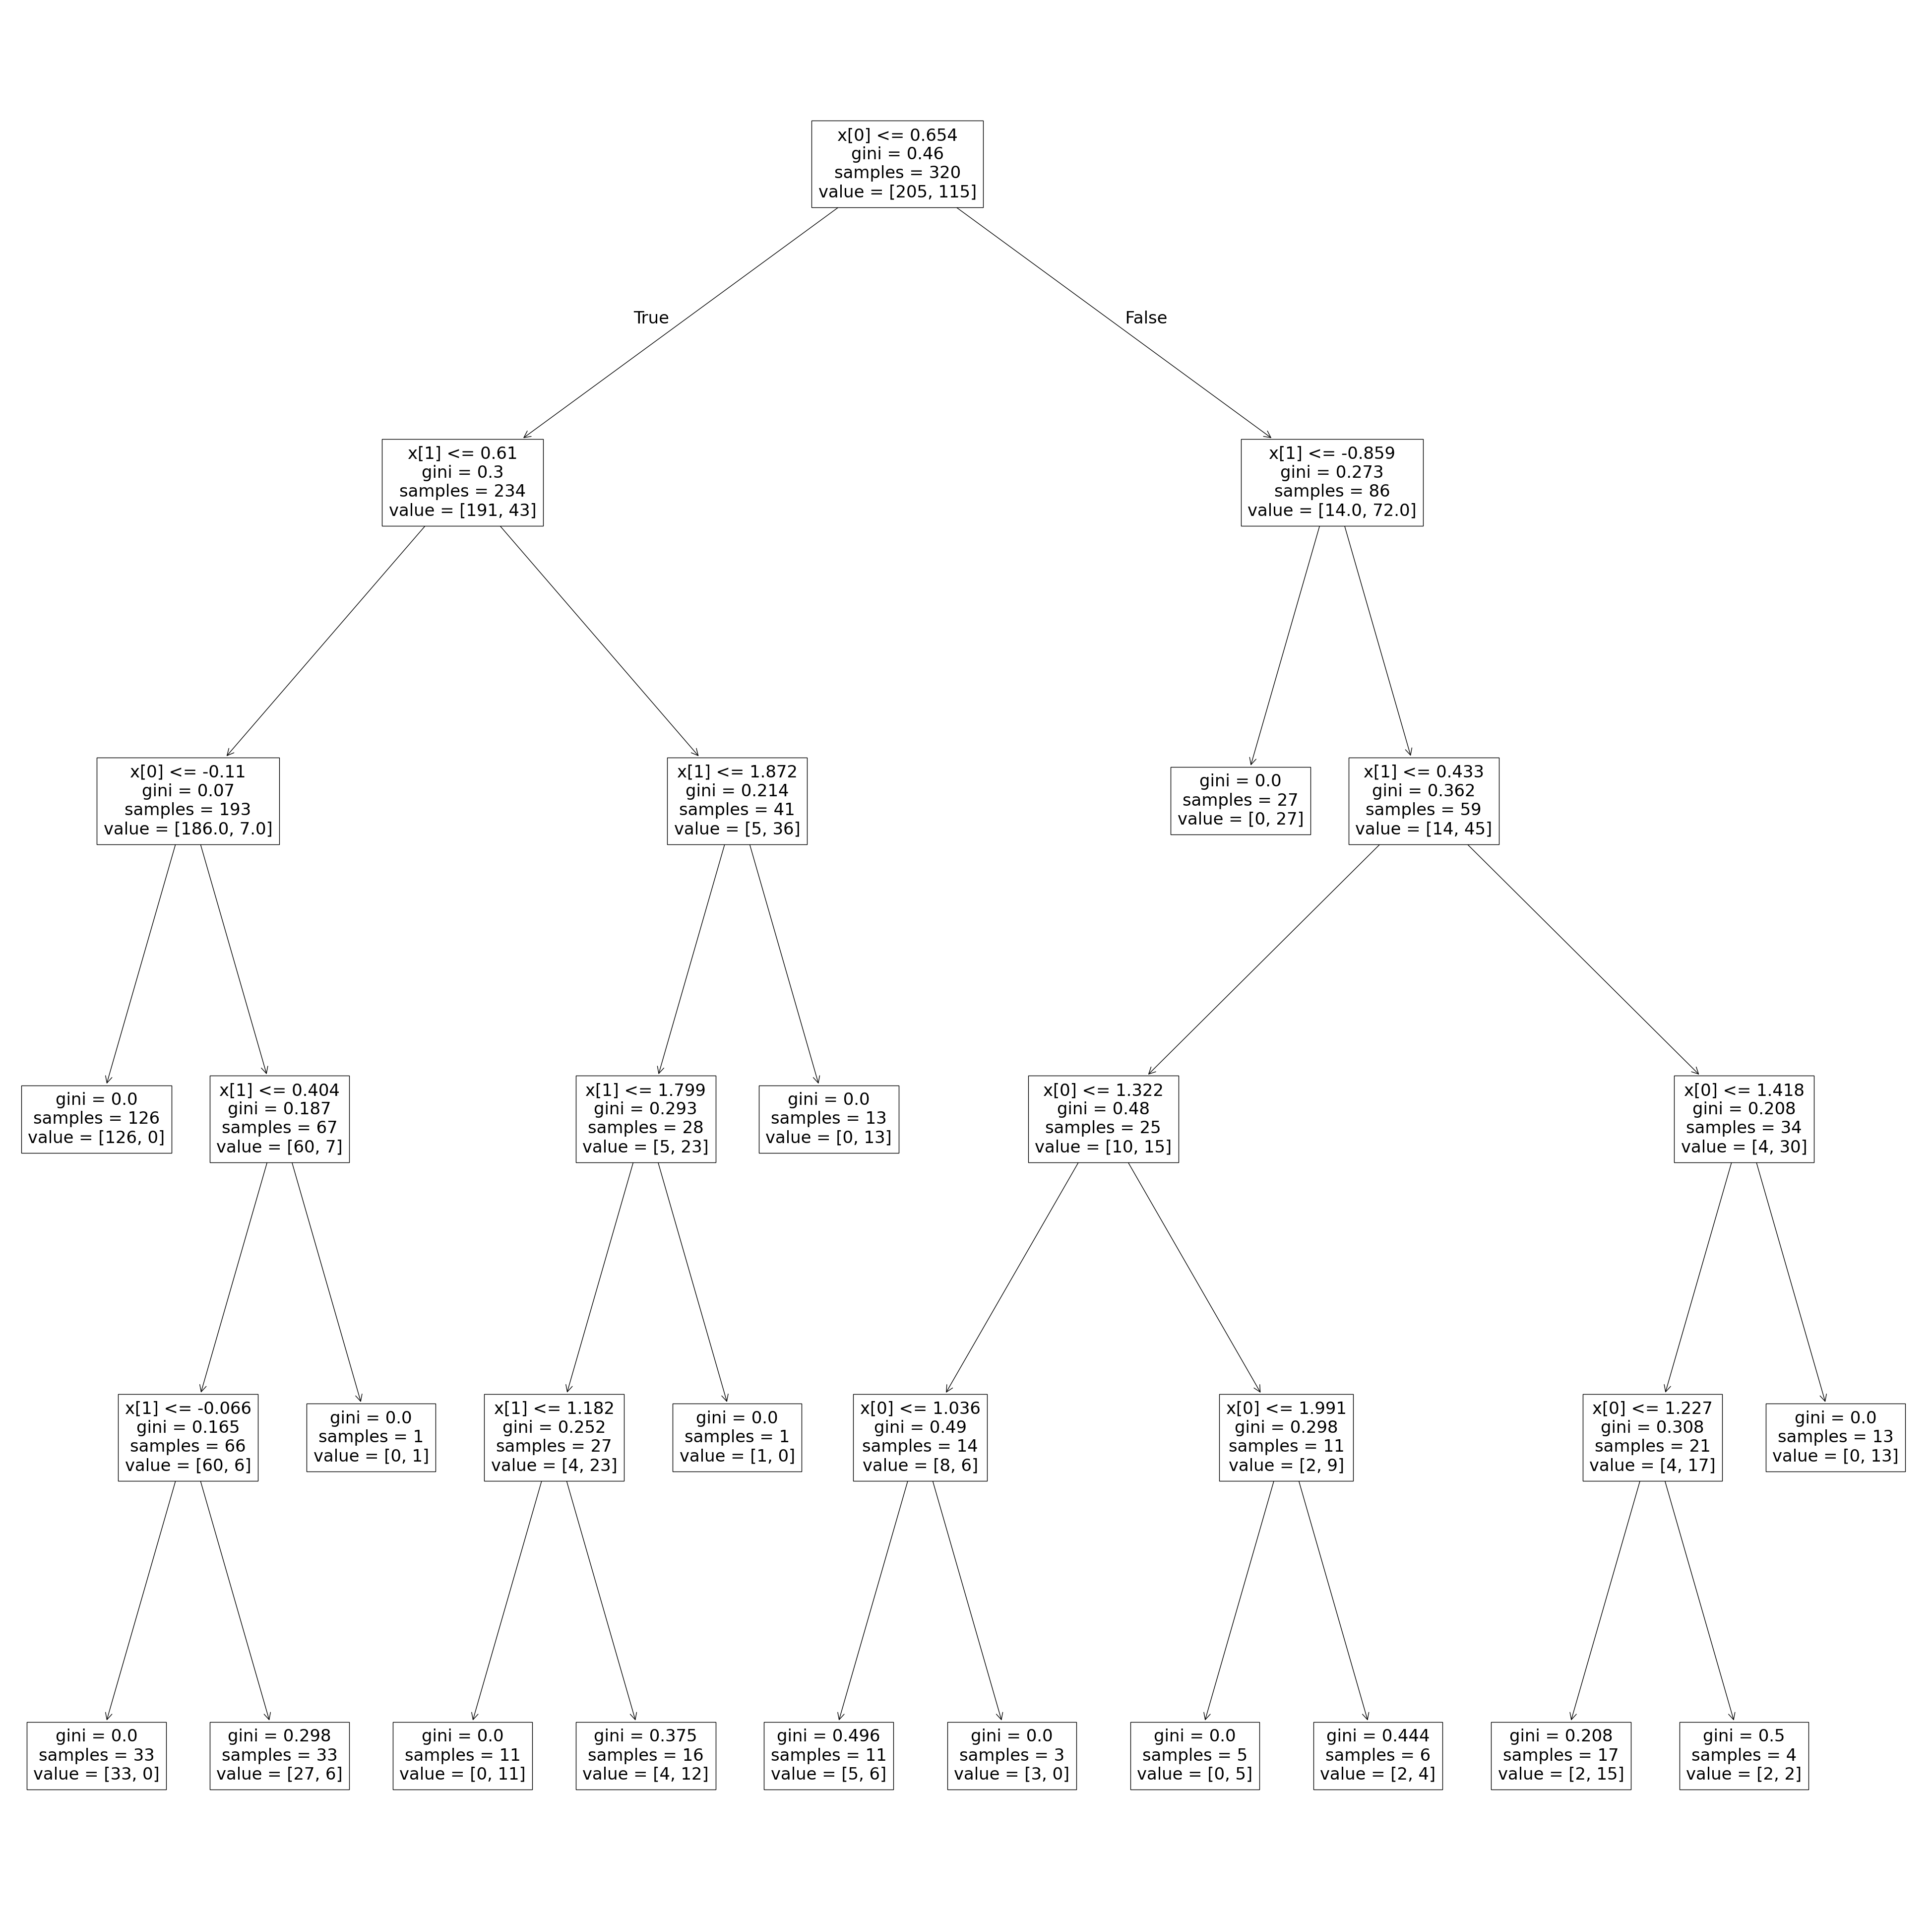

In [21]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.show()
#now tree go upto 5th level.

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


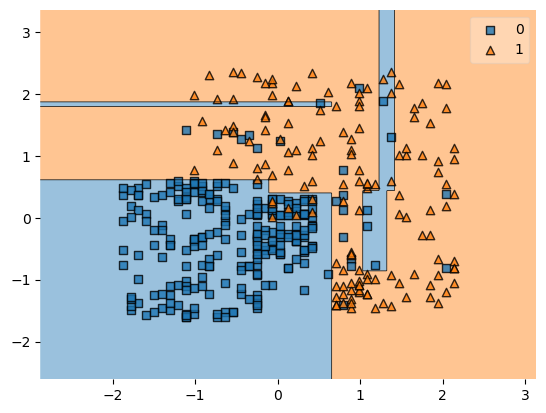

In [22]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dt)
plt.show()

# POST Pruning

In [27]:
#Here we try all posible depth to find best option of pruning
for i in range(1,20):
    dtpp = DecisionTreeClassifier(max_depth=i)
    dtpp.fit(x_train,y_train)
    print(i," -",dtpp.score(x_test,y_test)*100,";", dtpp.score(x_train,y_train)*100)
    #As we can see we get best result at level 2 & 3

1  - 90.0 ; 82.1875
2  - 91.25 ; 91.875
3  - 91.25 ; 91.875
4  - 91.25 ; 93.125
5  - 90.0 ; 93.4375
6  - 86.25 ; 95.0
7  - 85.0 ; 96.875
8  - 85.0 ; 97.1875
9  - 85.0 ; 98.125
10  - 85.0 ; 98.4375
11  - 83.75 ; 99.0625
12  - 83.75 ; 99.375
13  - 83.75 ; 99.6875
14  - 83.75 ; 99.6875
15  - 83.75 ; 99.6875
16  - 83.75 ; 99.6875
17  - 83.75 ; 99.6875
18  - 83.75 ; 99.6875
19  - 83.75 ; 99.6875


In [29]:
dtpp = DecisionTreeClassifier(max_depth=3) #we use max_depth to control the tree depth and save the data from overfeed
dtpp.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


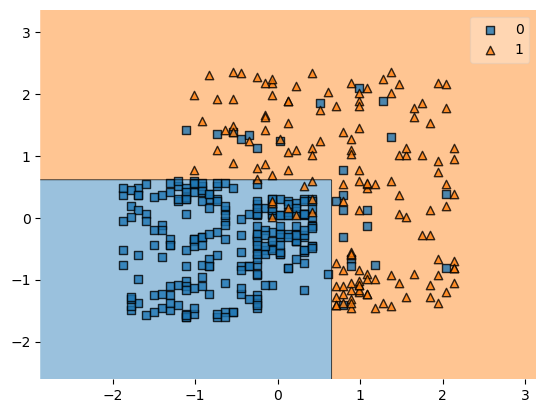

In [30]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=dtpp)
plt.show()